In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

fli22=pd.read_csv('Downloads/flights_weather2022.csv')
fli_we22=pd.read_csv('Downloads/flights2022.csv')
fli_we22.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [4]:
fli22.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [5]:
flights_info = pd.DataFrame({
    'Column': fli_we22.columns,
    'DataType': fli_we22.dtypes.astype(str),
    'MissingValues': fli_we22.isnull().sum(),
    'UniqueValues': fli_we22.nunique()
})
weather_info = pd.DataFrame({
    'Column': fli22.columns,
    'DataType': fli22.dtypes.astype(str),
    'MissingValues': fli22.isnull().sum(),
    'UniqueValues': fli22.nunique()
})
print("Flight Dataset Info:")
print(flights_info)

print("\nFlight + Weather Dataset Info:")
print(weather_info)


Flight Dataset Info:
                        Column DataType  MissingValues  UniqueValues
year                      year    int64              0             1
month                    month    int64              0             6
day                        day    int64              0            31
dep_time              dep_time  float64           2445          1316
sched_dep_time  sched_dep_time    int64              0           885
dep_delay            dep_delay  float64           2445           501
arr_time              arr_time  float64           2542          1422
sched_arr_time  sched_arr_time    int64              0          1171
arr_delay            arr_delay  float64           2679           521
carrier                carrier   object              0            12
flight                  flight    int64              0          1100
tailnum                tailnum   object            129          3520
origin                  origin   object              0             2
dest         

In [6]:
fli22.columns


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

In [7]:
numerical_cols = ['dep_delay', 'arr_delay', 'air_time', 'distance',
                  'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
                  'wind_gust', 'precip', 'pressure', 'visib']



In [8]:
correlation_matrix = fli22[numerical_cols].corr()


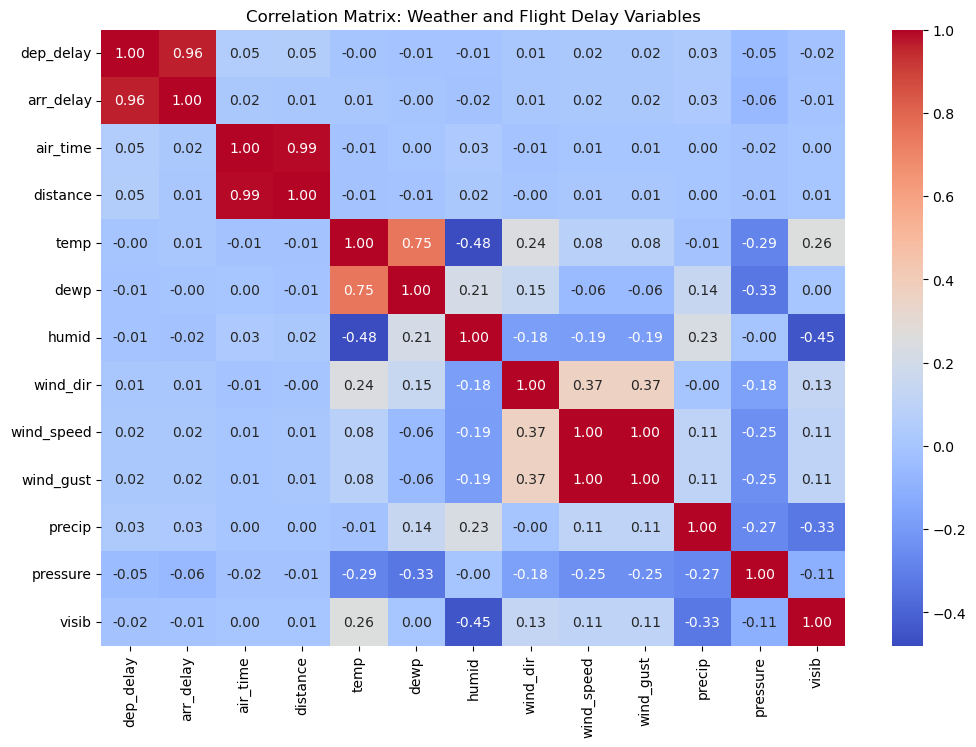

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Weather and Flight Delay Variables")
plt.show()


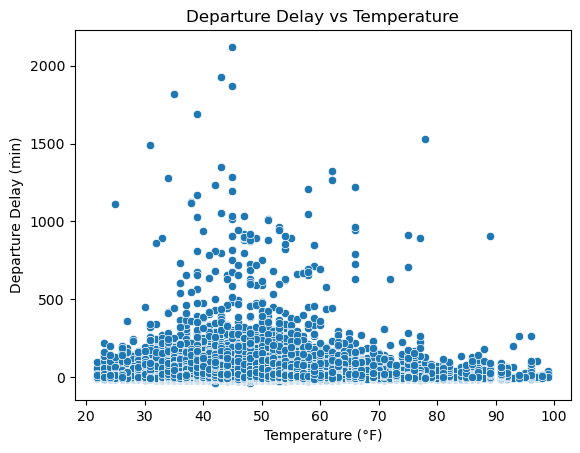

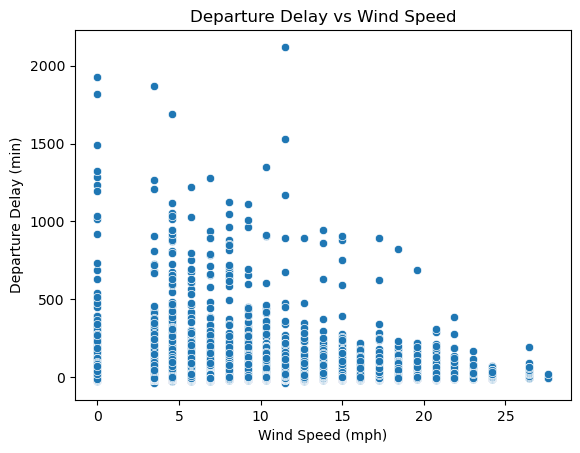

In [10]:
# Delay vs Temperatur
sns.scatterplot(data=fli22, x='temp', y='dep_delay')
plt.title('Departure Delay vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Departure Delay (min)')
plt.show()

# Delay vs Wind Speed
sns.scatterplot(data=fli22, x='wind_speed', y='dep_delay')
plt.title('Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (min)')
plt.show()


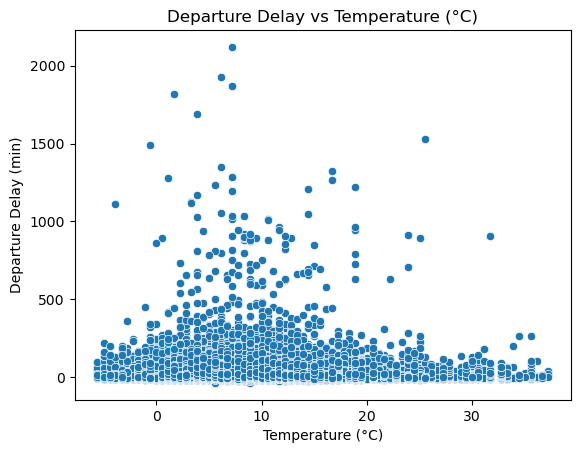

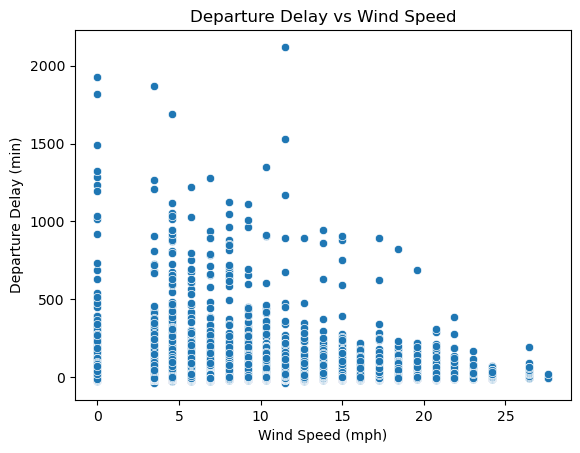

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for Celsius temperature
fli22['temp_C'] = (fli22['temp'] - 32) * 5 / 9

# Plot: Departure Delay vs Temperature in Celsius
sns.scatterplot(data=fli22, x='temp_C', y='dep_delay')
plt.title('Departure Delay vs Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Departure Delay (min)')
plt.show()

# Plot: Departure Delay vs Wind Speed (unchanged, still in mph)
sns.scatterplot(data=fli22, x='wind_speed', y='dep_delay')
plt.title('Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (min)')
plt.show()


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 4)  
y = np.random.randint(0, 2, 100)  

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
fli22.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib', 'temp_C'],
      dtype='object')

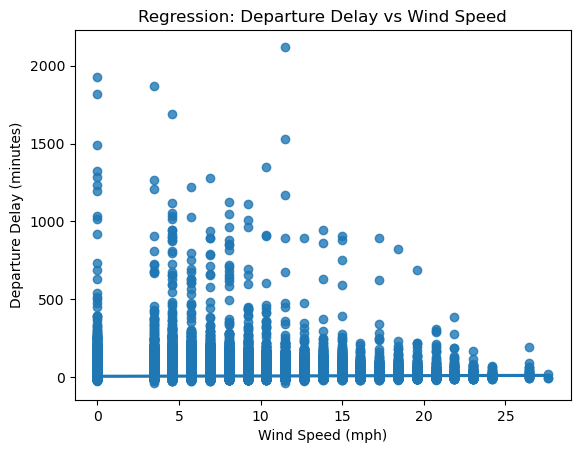

In [23]:
sns.regplot(x='wind_speed', y='dep_delay', data=fli22)
plt.title('Regression: Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (minutes)')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


MSE: 0.2274954811104502
R²: 1.9863250768303864e-05


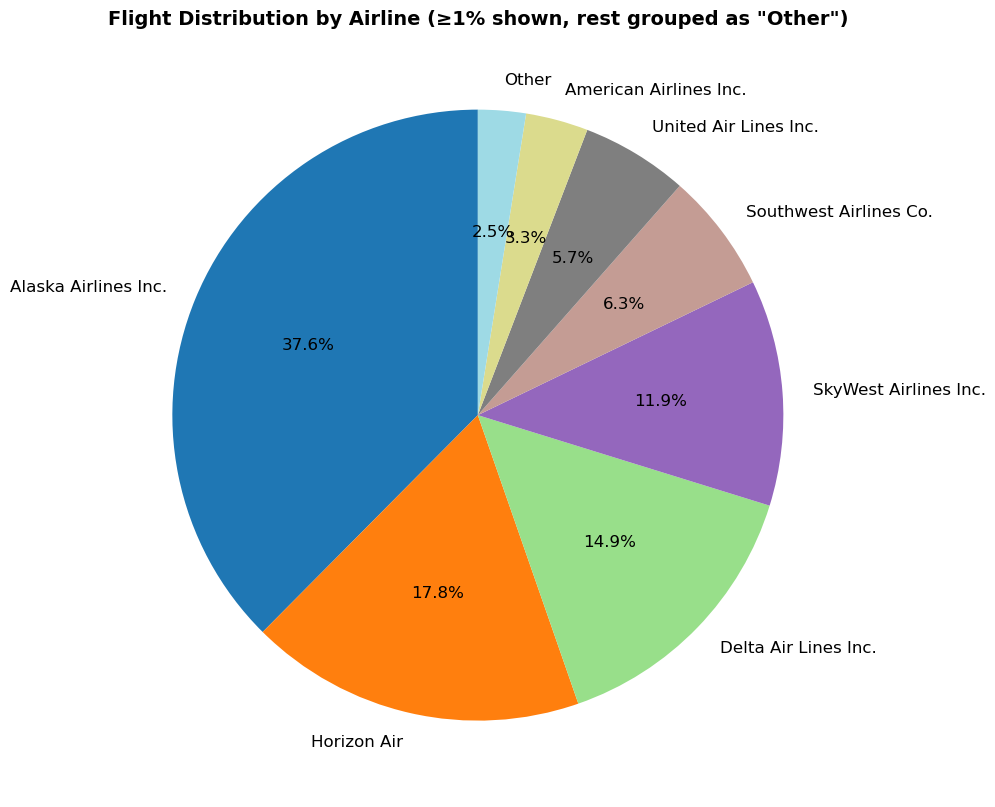

In [34]:
# Count flights per airline
airline_counts = fli22['airline'].value_counts(normalize=True) * 100  # Convert to percentage

# Threshold for grouping small percentages
threshold = 1  # 1%
large_airlines = airline_counts[airline_counts >= threshold]
small_airlines = airline_counts[airline_counts < threshold]

# Combine small values into "Other"
grouped_airlines = large_airlines.copy()
grouped_airlines['Other'] = small_airlines.sum()

# Plot
plt.figure(figsize=(10, 10))
grouped_airlines.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    cmap='tab20',
    textprops={'fontsize': 12}
)

plt.title('Flight Distribution by Airline (≥1% shown, rest grouped as "Other")', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16780\3741267486.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16780\3741267486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')


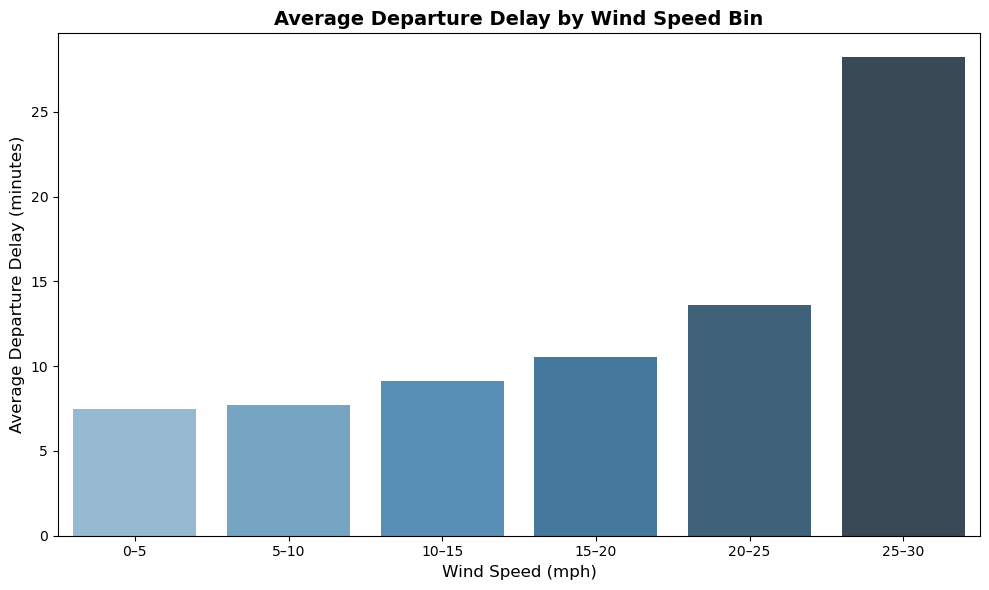

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for wind speed
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30']
fli22['wind_speed_bin'] = pd.cut(fli22['wind_speed'], bins=bins, labels=labels, include_lowest=True)

# Plot average departure delay per wind speed bin
plt.figure(figsize=(10, 6))
sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')

plt.title('Average Departure Delay by Wind Speed Bin', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16780\707899369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wind_speed_bin', y='dep_delay', data=fli22, palette='Set3')


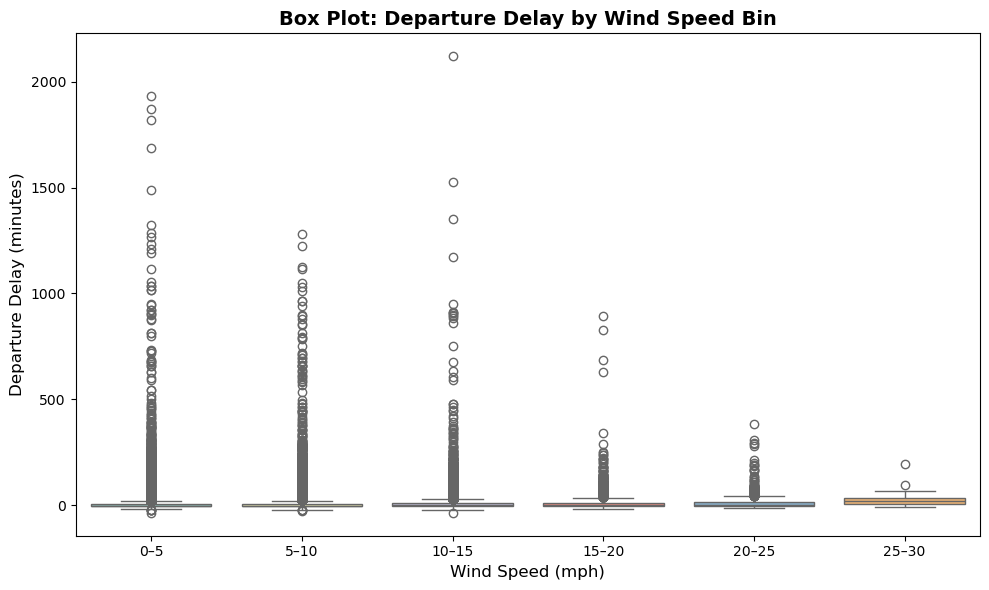

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Bin wind speed into categories
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30']
fli22['wind_speed_bin'] = pd.cut(fli22['wind_speed'], bins=bins, labels=labels, include_lowest=True)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='wind_speed_bin', y='dep_delay', data=fli22, palette='Set3')

plt.title('Box Plot: Departure Delay by Wind Speed Bin', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


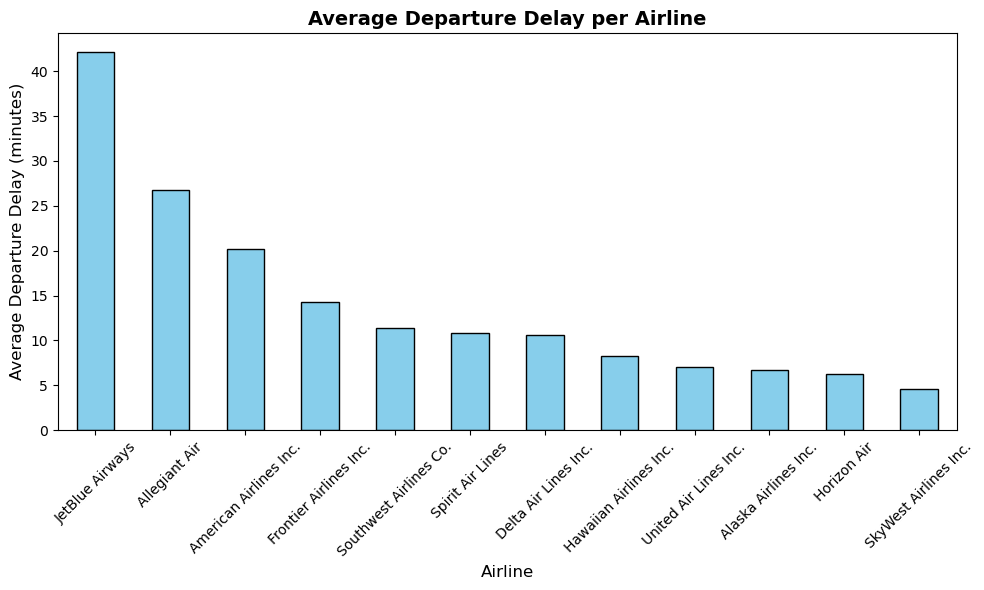

In [45]:
avg_dep_delay = fli22.groupby('airline')['dep_delay'].mean().sort_values(ascending=False)
avg_dep_delay = avg_dep_delay.dropna()


plt.figure(figsize=(10, 6))
avg_dep_delay.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Departure Delay per Airline', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Top 3 Airlines with the Highest Average Departure Delays
JetBlue Airways – 42.11 minutes

Allegiant Air – 26.77 minutes

American Airlines Inc. – 20.18 minutes

✅ Top 3 Airlines with the Lowest Average Departure Delays
SkyWest Airlines Inc. – 4.61 minutes

Horizon Air – 6.28 minutes

Alaska Airlines Inc. – 6.75 minutes

✅ Top 3 Airlines with the Highest Average Arrival Delays
JetBlue Airways – 31.38 minutes

Allegiant Air – 22.22 minutes

Frontier Airlines Inc. – 10.98 minutes

✅ Top 3 Airlines with the Lowest Average Arrival Delays
United Air Lines Inc. – −4.51 minutes (early arrivals on average)

SkyWest Airlines Inc. – −0.54 minutes

Delta Air Lines Inc. – 0.91 minutes

<Figure size 1200x600 with 0 Axes>

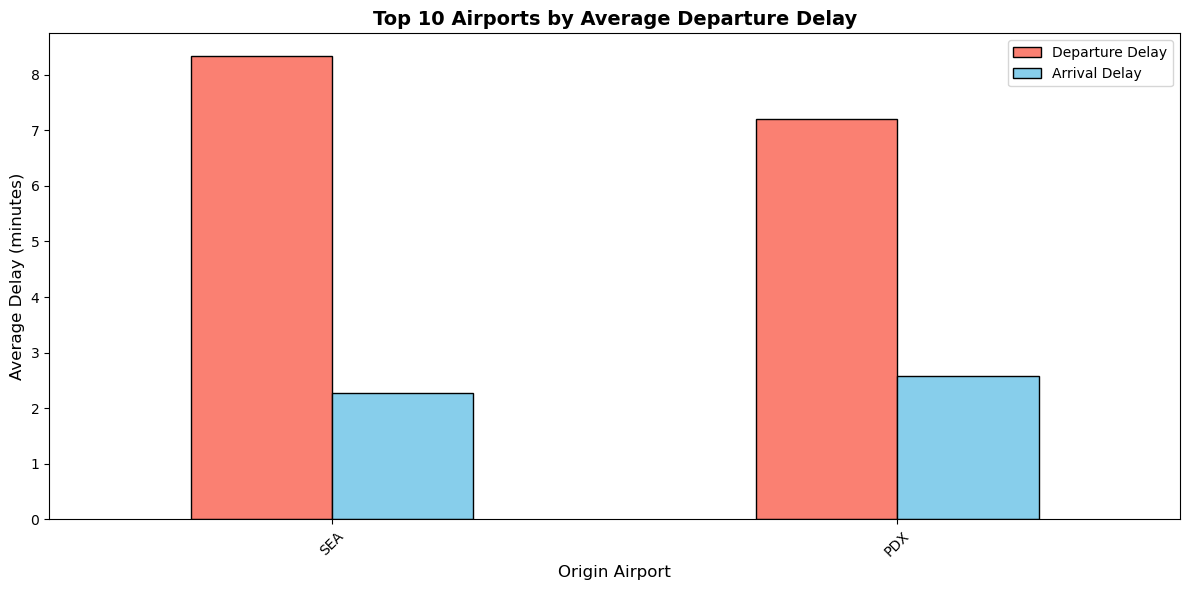

In [46]:
# 1. Calculate average departure and arrival delay by origin airport
origin_avg_delays = fli22.groupby('origin')[['dep_delay', 'arr_delay']].mean().sort_values(by='dep_delay', ascending=False)

# 2. Filter top 10 airports by average departure delay
top10_origin_delays = origin_avg_delays.head(10)

# 3. Plotting the delays
plt.figure(figsize=(12, 6))
top10_origin_delays[['dep_delay', 'arr_delay']].plot(kind='bar', figsize=(12, 6), color=['salmon', 'skyblue'], edgecolor='black')

plt.title('Top 10 Airports by Average Departure Delay', fontsize=14, fontweight='bold')
plt.xlabel('Origin Airport', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()
